In [3]:
# Some general setup
import os
import random
import numpy as np
import matplotlib.pyplot as plt
import cv2 

def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder,filename),cv2.IMREAD_GRAYSCALE)
        if img is not None:
            images.append(img)
    return images

img_folder = '/home/wf1497c/ML/UCSD/ECE 269/hw4/upload_dataset'
images = load_images_from_folder(img_folder)

In [14]:
X_neutral = []
X_smile = []
M = len(images)
original_size = images[0].shape
for i in range(int(M / 2)):
    X_neutral.append(images[i].flatten())

for i in range(int(M / 2)):
    X_smile.append(images[2 * i + 1].flatten())

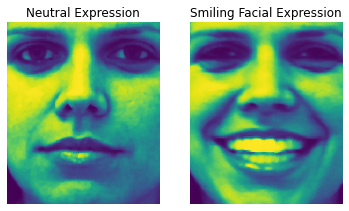

In [16]:
plt.subplot(1,2,1)
plt.imshow(X_neutral[0].reshape(original_size))
plt.axis('off')
plt.title('Neutral Expression')
plt.subplot(1,2,2)
plt.imshow(X_smile[0].reshape(original_size))
plt.axis('off')
plt.title('Smiling Facial Expression')

plt.show()

In [17]:
mean_neutral = np.mean(X_neutral, axis=0)
mean_smile = np.mean(X_smile, axis=0)

In [18]:
X_neutral_nor = X_neutral - mean_neutral # shape of (200, 31266)
X_smile_nor = X_smile - mean_smile # shape of (200, 31266)

In [22]:
# Compute eigenvectors and eigenvalues. The column v[:,i] is the eigenvector and each eigenvector is unitary.
evalue_neutral, evector_neutral = np.linalg.eig(np.dot(X_neutral_nor[range(0,171),:],X_neutral_nor[range(0,171),:].T))
evalue_smile, evector_smile = np.linalg.eig(np.dot(X_smile_nor[range(0,171),:],X_smile_nor[range(0,171),:].T))

# As usual, check and print out the size of the matrix.
print('Eigenvalues of neutral training data: ', evalue_neutral.shape)
print('Eigenvectors of neutral training data: ', evector_neutral.shape)
print('Eigenvalues of smile training data: ', evalue_smile.shape)
print('Eigenvectors of smile training data: ', evector_smile.shape)

# Sort eigenvalues and corresponding eigenvectors
idx = evalue_neutral.argsort()[::-1] 
evalue_neutral = evalue_neutral[idx]
evector_neutral = evector_neutral[:,idx]

idx = evalue_smile.argsort()[::-1] 
evalue_smile = evalue_smile[idx]
evector_smile = evector_smile[:,idx]

Eigenvalues of neutral training data:  (171,)
Eigenvectors of neutral training data:  (171, 171)
Eigenvalues of smile training data:  (171,)
Eigenvectors of smile training data:  (171, 171)


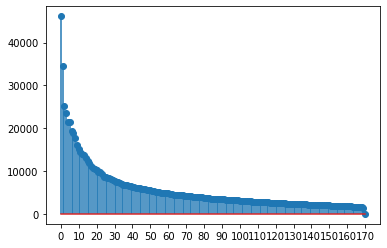

In [25]:
plt.stem(np.sqrt(evalue_neutral),use_line_collection=True)
my_x_ticks = np.arange(0, 171, 10)
plt.xticks(my_x_ticks)
plt.show()

In [27]:
# Compute eigenfaces
eigenface_neutral = np.dot(X_neutral_nor[range(0,171),:].T,evector_neutral)
eigenface_smile = np.dot(X_smile_nor[range(0,171),:].T,evector_smile)

# We should normalize the eigenfaces, making every eigenfaces to be unitary
eigenface_neutral = np.divide(eigenface_neutral , np.linalg.norm(eigenface_neutral , axis = 0))
eigenface_smile = np.divide(eigenface_smile , np.linalg.norm(eigenface_smile , axis = 0))

# Check and print the size of each eigenface. The column is the eigenface and each eigenface is unitary.
print('Single eigenface size: ', eigenface_neutral[:,0:1].shape)
# print(eigenface_neutral[:,0:1])
# PC = eigenface_neutral[:,0:20+1].T
# print(PC.shape)

Single eigenface size:  (31266, 1)


In [28]:
def MSE(ground_truth, reconst):
    """ This function is for compute the MSE """
    mse = ((ground_truth - reconst) ** 2).mean(axis = 0)
    return mse

def Reconstruct_MSE(num_PC, select_img, efaces, evalues):
    """ Reconstruct image and plot MSE vs different numbers of PC """
    PC = efaces[:,0:num_PC+1].T
    W =  np.dot(PC, select_img)
    reconst = np.dot(PC.T, W)
    # Compute the MSE
    mse = MSE(select_img, reconst)
    return mse

In [30]:
num_image_select = 3
idx = np.random.choice(range(0,171), num_image_select, replace=False)
select_img = X_neutral_nor[idx,:].T
print(idx)

[ 48 116  93]


In [36]:
# In this cell, I write in a naive way. It is not efficient but only for easy writing. It's better to try matrix way.
# Define 3 list to store MSE result
mse_1 = []

for num_PC in range(1,171):
    mse = Reconstruct_MSE(num_PC, select_img, eigenface_neutral, evalue_neutral)
    mse_1.append(mse[0])

([<matplotlib.axis.XTick at 0x7f23240e21c0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

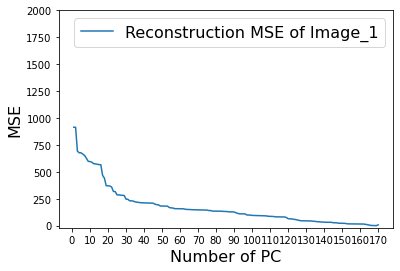

In [37]:
plt.plot(range(1,171), mse_1, linestyle='-', label="Reconstruction MSE of Image_1")
plt.ylim(-20,2000)
plt.legend(loc="upper right", fontsize=16)
plt.ylabel("MSE", fontsize=16)
plt.xlabel("Number of PC", fontsize=16)
my_x_ticks = np.arange(0, 171, 10)
plt.xticks(my_x_ticks)